In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tokenization
from wordcloud import STOPWORDS

## Competition description
In this competition, you’re challenged to build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t. You’ll have access to a dataset of 10,000 tweets that were hand classified. 

Submissions are evaluated using F1 between the predicted and expected answers.

## Exploratory Data Analysis

In [4]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
print(df_train.shape, df_test.shape)

(7613, 5) (3263, 4)


In [9]:
df_train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [29]:
# Check for NaN count

print("Training data:")
for column in df_train.columns:
    missing = df_train[column].isna().sum()
    print(column, missing, round(missing / len(df_train) *100, 2))
print("Testing data")
for column in df_test.columns:
    missing = df_test[column].isna().sum()
    print(column, missing, round(missing / len(df_train) *100, 2))

Training data:
id 0 0.0
keyword 61 0.8
location 2533 33.27
text 0 0.0
target 0 0.0
Testing data
id 0 0.0
keyword 26 0.34
location 1105 14.51
text 0 0.0


Per observation, the amount of missing values in `location` column is significant. Therefore it should not be used as any feature for training.

In [36]:
df_train["target"].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

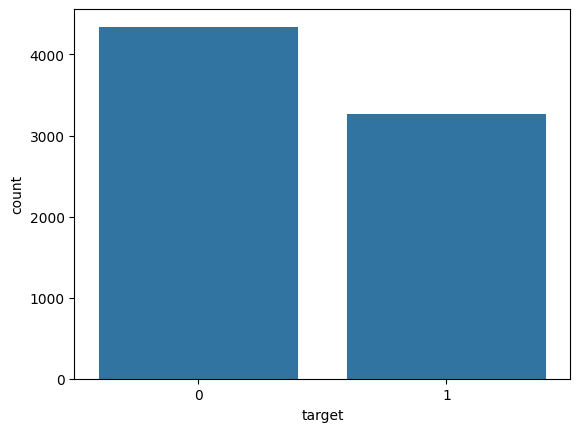

In [38]:
sns.barplot(df_train["target"].value_counts())

Per observation, this dataset provides a good balance between the number of positive and negative samples. Therefore, the dataset does not require any resampling.

The problem becomes a simple binary classification.